# Segmentation

- 모델명 : yolov8?-seg

## Segmentation 추론결과 조회
- segmentation 추론 결과는 Masks를 이용해 분할된 mask 정보와 Boxes를 이용해 추론한 bounding box의 결과를 조회한다.
- **ultralytics.yolo.engine.results.Masks**
    - Segmentation 의 결과 type
    - Results.masks 로 조회한다.
    - 주요 속성, 메소드
        - shape: [object 개수, height, width]
            - height, width: mask image size
        - data: 결과 Tensor(3차원 배열) 반환. `0: 배경, 1: 물체` 를 원소로 가지는 결과 Tensor를 반환한다.
            - 픽셀별로 물체 인지 아닌 지를 표현하는 tensor를 반환
        - xy : mask의 bounding 좌표(경계선 좌표)를 물체별로 list에 담아서 반환한다.
            - Object의 외곽선을 그리는 좌표들을 반환
            - 개별 object 의 좌표들은 \[point개수, x좌표, y좌표\] shape의 ndarray로 구성된다.
        - xyn: xy의 결과를 이미지 크기 대비 비율로 normalize한 결과.
- **ultralytics.yolo.engine.results.Boxes**
     - Results.boxes로 조회
    - 주요 속성
        - shape: 결과 shape. (찾은 물체개수, 6)
        - boxes
            - 6: 좌상단 x, 좌상단 y, 우하단 x, 우하단 y, confidence score, label
        - xyxy
            - bounding box의 `좌상단 x, 좌상단 y, 우하단 x, 우하단 y` 좌표 반환
        - xyxyn
            - xyxy를 이미지 대비 비율로 반환
        - xywh
            - bounding box의 `center x, center y, 너비, 높이` 를 반환
        - xywhn
            - xywh를 이미지 대비 비율로 반환
        - cls: 찾은 물체의 label
        - conf: cls에 대한 confidence score (그 물체일 확률)
        - boxes
            - `x, y, x, y, conf, cls` tensor를 반환            

In [4]:
## CLI
# !yolo task=segment mode=predict model=models/yolov8n-seg.pth source=image경로 ..
## 코드
from ultralytics import YOLO
model = YOLO("models/yolov8n-seg.pt")
# result = model("02_test_image_seg/beatles.jpg", save=True, conf=0.5, verbose=False)
### 디렉토리 안의 모든 이미지/동영상을 검출
# result = model("02_test_image_seg/", save=True, conf=0.5, verbose=False)
result = model(
    ["02_test_image_seg/beatles.jpg", "02_test_image_seg/bus.jpg"],
    save=True, verbose=False)

Results saved to C:\Classes\DA-35\runs\segment\predict10


In [3]:
type(result), len(result)

(list, 1)

In [5]:
type(result[0]) # 개별 이미지 검출 결과: Results
## YOLO segmentation 검출결과: segement + object detection
#segment: Results.masks - Masks
#detect:    Results.boxes  - Boxes

ultralytics.engine.results.Results

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

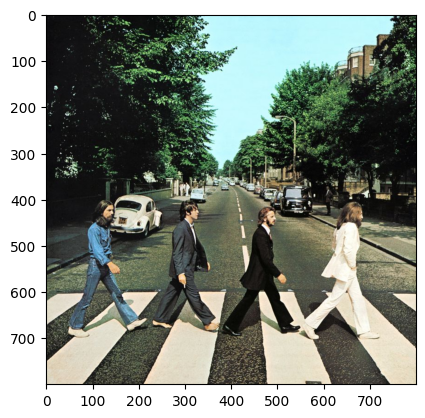

In [12]:
import matplotlib.pyplot as plt
result[0].orig_shape
result[0].path
plt.imshow(result[0].orig_img[:,:,::-1]);
print(result[0].names)

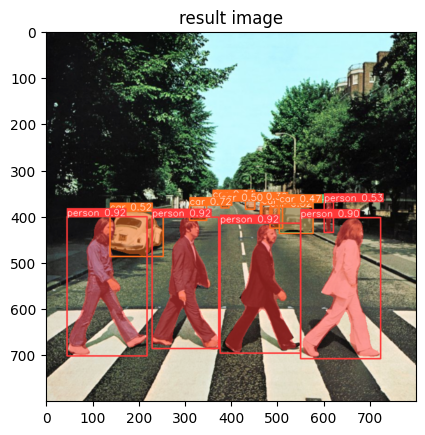

In [15]:
plt.imshow(result[0].plot()[:, :, ::-1])
plt.title("result image")
plt.show()

In [16]:
# masks: Seg  결과 조회
masks = result[0].masks
print(type(masks))

<class 'ultralytics.engine.results.Masks'>


In [20]:
### mask image shape
masks.shape # [15: 찾은 물체개수, 640:H, 640:W]

torch.Size([15, 640, 640])

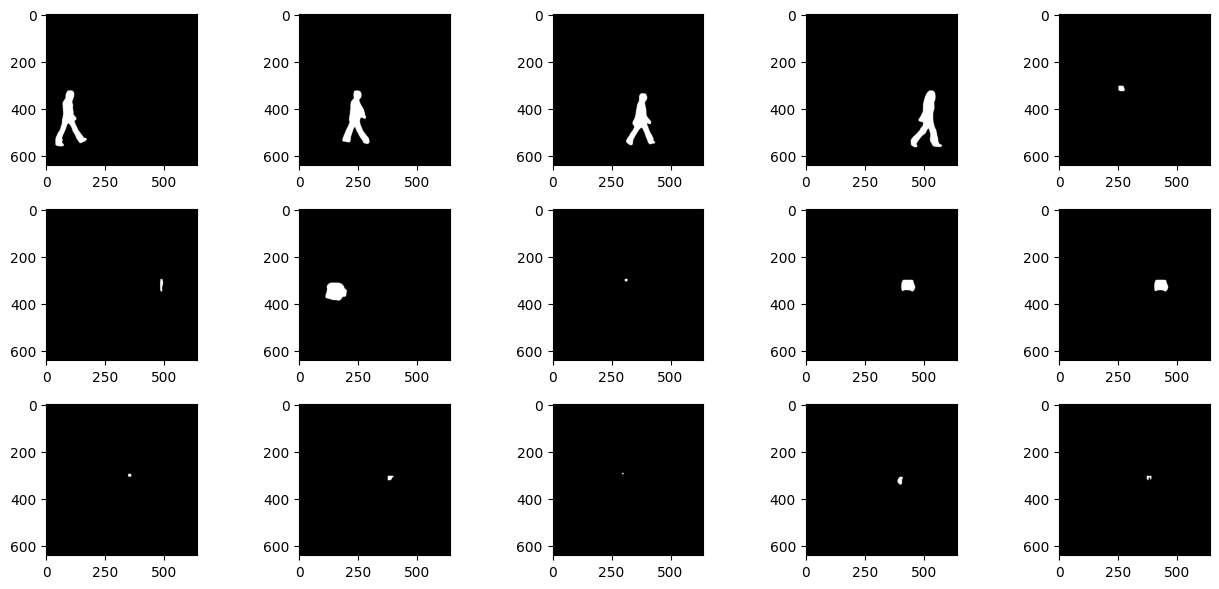

In [17]:
### mask image  조회 - masks.data
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
for idx in range(15):
    plt.subplot(3, 5, idx+1)
    m_img = masks.data[idx]
    plt.imshow(m_img, cmap="gray")

plt.tight_layout()
plt.show()

In [24]:
## 물체 외곽선의 좌표 (poly line)  masks.xy, masks.xyn
xys = masks.xy
print(type(xys), len(xys))  # 찾은 object 별로 좌표들을 묶어서 제공. : list
print(type(xys[0]), xys[0].shape) # 첫번째 object의 외곽선의 좌표들. (364:점의개수, 2:x,y)
# ### (점의개수, 2)
xys[0][:5], xys[0][-1]

<class 'list'> 15
<class 'numpy.ndarray'> (364, 2)


(array([[     298.75,         405],
        [      297.5,      406.25],
        [        295,      406.25],
        [     291.25,         410],
        [     291.25,       412.5]], dtype=float32),
 array([     136.25,         405], dtype=float32))

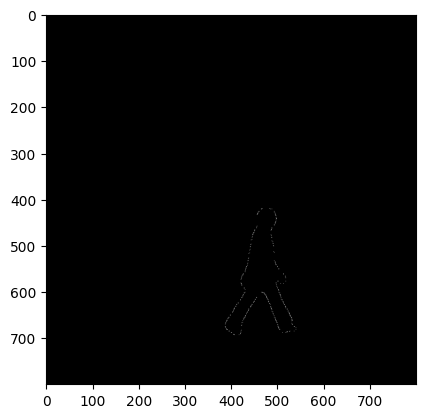

In [30]:
## 외곽선 좌표 그리기
import numpy as np
import matplotlib.pyplot as plt
idx = 2
# backgroud_arr = np.zeros(result[0].orig_shape)
backgroud_arr = np.zeros((800, 800))
x = xys[idx][:, 0].astype("int32")
y = xys[idx][:, 1].astype('int32')
backgroud_arr[y, x] = 1
plt.imshow(backgroud_arr, cmap='gray')
plt.show()

In [33]:
#### masks.xyn  # point들의 xy 좌표를 이미지 대비 비율로 normalize한 좌표
masks.xy[0]/800#  ==> xyn

array([[    0.14687,     0.50625],
       [    0.14531,     0.50781],
       [    0.14375,     0.50781],
       [    0.14062,     0.51094],
       [    0.14062,      0.5125],
       [     0.1375,     0.51562],
       [     0.1375,     0.51719],
       [    0.13594,     0.51875],
       [    0.13594,     0.52031],
       [    0.13438,     0.52188],
       [    0.13438,     0.52344],
       [    0.13281,       0.525],
       [    0.13281,     0.52812],
       [    0.13125,     0.52969],
       [    0.13125,     0.53438],
       [    0.12969,     0.53594],
       [    0.12969,     0.55313],
       [    0.12812,     0.55469],
       [    0.12812,     0.55781],
       [    0.12656,     0.55937],
       [    0.12656,     0.56094],
       [    0.12344,     0.56406],
       [    0.12344,     0.56563],
       [    0.11875,     0.57031],
       [    0.11875,     0.57187],
       [    0.11719,     0.57344],
       [    0.11719,       0.575],
       [    0.11406,     0.57812],
       [    0.11406,

In [36]:
masks.xyn[0][:5]

array([[    0.14687,     0.50625],
       [    0.14531,     0.50781],
       [    0.14375,     0.50781],
       [    0.14062,     0.51094],
       [    0.14062,      0.5125]], dtype=float32)

In [37]:
######## Bounding Box, Class 추론결과 -> Results.boxes: Boxes
boxes = result[0].boxes
type(boxes)  # BBox

ultralytics.engine.results.Boxes

In [41]:
#### BBox 정보
boxes.xyxy.shape # [사물개수, box좌표: 좌상단 x, y, 우하단 x, y]
boxes.xyxyn.shape # xyxy를 이미지 크기 대비 비율로 변환 -> normalize

torch.Size([15, 4])

In [43]:
boxes.xywh.shape  # bbox좌표: center_x, y, width, height
boxes.xywhn.shape  # xywh를 normalize 한 결과.

torch.Size([15, 4])

In [48]:
######### class 정보
# class index 
boxes.cls.shape  # 찾은 물체들의 index 
# 확률
boxes.conf.shape

torch.Size([15])

In [51]:
for idx, (cls, conf) in enumerate(zip(boxes.cls, boxes.conf)):
    print(f"{idx+1}. {int(cls)}/{result[0].names[int(cls)]} - {conf:.2f}")

1. 0/person - 0.92
2. 0/person - 0.92
3. 0/person - 0.92
4. 0/person - 0.90
5. 2/car - 0.72
6. 0/person - 0.53
7. 2/car - 0.52
8. 2/car - 0.50
9. 2/car - 0.47
10. 7/truck - 0.40
11. 2/car - 0.39
12. 2/car - 0.38
13. 2/car - 0.34
14. 2/car - 0.32
15. 2/car - 0.31


In [118]:
############### 사람을 표시하는 masking image를 만들기.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 생성 +  추론
model = YOLO("models/yolov8m-seg.pt")
img_path = "02_test_image_seg/bus.jpg"
result = model(img_path, verbose=False)[0]  # 결과 [Results] 1개 (추론 이미지 개수: 1)

masks = result.masks
boxes = result.boxes

## 마스크 이미지를 그릴 배열. size는 원본 이미지 크기
#### mask img: 내가 보려하는 부분(mask)과 안볼 부분을 분리해 놓는것.
###### mask: 255,   unmask: 0
arr = np.zeros(result.orig_shape, dtype="uint8")  # 외곽선만 그릴 배열 -> 외곽선 픽셀: 255 로 변경.
instance_mask = np.zeros_like(arr, dtype="uint8") # object(찾은 물체)의 mask 를 설정할 배열. object의 픽셀만 255로 변경.
background_mask = np.full_like(arr, fill_value=255, dtype="uint8") # 배경에 mask를 설정할 배열. object 픽셀만 0으로 변경.

# 추론 결과에서 외곽선의 point들을 조회
xy_list = masks.xy  # [ ndarray(점개수, 2), ndarray, ...]  # ndarray 1개: 한개의 object

## 개별 object별로 처리(masking)  ==> object가 사람이면 masking 작업을 한다.
for i in range(len(xy_list)):
    if boxes.cls[i] == 0: ## person 이라면
        # point들의 좌표(정수)를 이용해서 선을 연결. - cv2.polylines()
        arr = cv2.polylines(arr, [xy_list[i].astype('int32')], isClosed=True, color=255, thickness=2)
        instance_mask = cv2.fillPoly(instance_mask, [xy_list[i].astype('int32')], 255)
        background_mask = cv2.fillPoly(background_mask, [xy_list[i].astype('int32')], 0)

cv2.imshow("frame", arr)
cv2.waitKey()

cv2.imshow("frame", instance_mask)
cv2.waitKey()

cv2.imshow("frame", background_mask)
cv2.waitKey()

cv2.destroyAllWindows()

In [91]:
### 원본이미지의 사람에 외곽선을 그리기.
edge_img = cv2.add(
    result.orig_img,    # 추론대상원본 이미지
    cv2.cvtColor(arr, cv2.COLOR_GRAY2BGR)
)
cv2.imshow("result", edge_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [92]:
##### 원본 이미지에 사람을 제거.
no_obj_img = cv2.add(
    result.orig_img,    # 추론대상원본 이미지
    cv2.cvtColor(instance_mask, cv2.COLOR_GRAY2BGR)
)
cv2.imshow("result", no_obj_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [93]:
##### 원본 이미지에 배경을 제거.
no_bg_img = cv2.add(
    result.orig_img,    # 추론대상원본 이미지
    cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)
)
cv2.imshow("result", no_bg_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
######### bitwise_and를 이용해서 mask 부분만 추출.
## bitwise 연산 -> bit 단위로 계산. (2진-0, 1 로 계산.)
# and (&) :  1 & 1 = 1, 나머지는 0
# or ( | ) : 0 | 0 = 0 , 나머지는 1
# XOR(^):  피연산가 다르면 1, 같으면 0 (1^0, 0^1 =1)
# not : 단항연산. 1 -> 0, 0 -> 1
# shift: >> <<  - 비트를 옮기는 연산.

In [ ]:
# cv2.bitwise_and(a, b)  # a와 b를 and 연산.  (element-wise 연산.)
# cv2.bitwise_and(a, b, mask)  # a & b 그 결과에서 mask 부분만 추출. (나머진 0)

In [109]:
#####################################
#  사람은 그대로 나오고 배경은 아웃포커싱 효과(blur)

## 1. 사람만 추출
instance = cv2.bitwise_and(
    result.orig_img, 
    result.orig_img, 
    mask=instance_mask  # 255인 영역만 추출. (나머진 다 0)
)
cv2.imshow("result", instance)
cv2.waitKey()
cv2.destroyAllWindows()

In [102]:
### 2. 배경만 추출
background = cv2.bitwise_and(
    result.orig_img, result.orig_img, mask=background_mask
)
cv2.imshow("result", background)
cv2.waitKey()
cv2.destroyAllWindows()

In [108]:
### 아웃포커싱 처리
#3. background blur 처리.
background_blur = cv2.GaussianBlur(background, (0, 0), sigmaX=3) #sigmaX(표준편차)  클수록 blur효과가 강해진다.

cv2.imshow("result", background_blur)
cv2.waitKey()
cv2.destroyAllWindows()

In [122]:
### instance 에 blur처리된 배경을 합쳐서 결과물 생성
result_image = np.where(
    background_mask[..., np.newaxis] != 0,   # 배경 pixcel이면
    background_blur,     # element-wise 연산에 의해서 조건(True) pixcel index의 값을 return
    instance                # element-wise 연산에 의해서 조건(False) pixcel index의 값을 return
)
cv2.imshow("result", result_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [128]:
#########################
###합치기.
#########################
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 생성 +  추론
# img_path = "02_test_image_seg/bus.jpg"
img_path = "02_test_image_seg/beatles.jpg"

model = YOLO("models/yolov8m-seg.pt")
result = model(img_path, verbose=False)[0]  # 결과 [Results] 1개 (추론 이미지 개수: 1)

masks = result.masks
boxes = result.boxes

## 마스크 이미지를 그릴 배열. size는 원본 이미지 크기
#### mask img: 내가 보려하는 부분(mask)과 안볼 부분을 분리해 놓는것.
###### mask: 255,   unmask: 0
arr = np.zeros(result.orig_shape, dtype="uint8")  # 외곽선만 그릴 배열 -> 외곽선 픽셀: 255 로 변경.
instance_mask = np.zeros_like(arr, dtype="uint8") # object(찾은 물체)의 mask 를 설정할 배열. object의 픽셀만 255로 변경.
background_mask = np.full_like(arr, fill_value=255, dtype="uint8") # 배경에 mask를 설정할 배열. object 픽셀만 0으로 변경.

# 추론 결과에서 외곽선의 point들을 조회
xy_list = masks.xy  # [ ndarray(점개수, 2), ndarray, ...]  # ndarray 1개: 한개의 object

## 개별 object별로 처리(masking)  ==> object가 사람이면 masking 작업을 한다.
for i in range(len(xy_list)):
    if boxes.cls[i] == 0: ## person 이라면
        # point들의 좌표(정수)를 이용해서 선을 연결. - cv2.polylines()
        # arr = cv2.polylines(arr, [xy_list[i].astype('int32')], isClosed=True, color=255, thickness=2)
        instance_mask = cv2.fillPoly(instance_mask, [xy_list[i].astype('int32')], 255)
        background_mask = cv2.fillPoly(background_mask, [xy_list[i].astype('int32')], 0)

## 1. 사람만 추출
instance = cv2.bitwise_and(
    result.orig_img, 
    result.orig_img, 
    mask=instance_mask  # 255인 영역만 추출. (나머진 다 0)
)
### 2. 배경만 추출
background = cv2.bitwise_and(
    result.orig_img, result.orig_img, mask=background_mask
)
#3. background blur 처리.
background_blur = cv2.GaussianBlur(background, (0, 0), sigmaX=3) #sigmaX(표준편차)  클수록 blur효과가 강해진다.

#4.  instance 에 blur처리된 배경을 합쳐서 결과물 생성
result_image = np.where(
    background_mask[..., np.newaxis] != 0,   # 배경 pixcel이면
    background_blur,     # element-wise 연산에 의해서 조건(True) pixcel index의 값을 return
    instance                # element-wise 연산에 의해서 조건(False) pixcel index의 값을 return
)
cv2.imshow("result", result_image)
cv2.waitKey()
cv2.destroyAllWindows()

# custom dataset training

- custom dataset training은 object detection과 동일
- custom dataset: https://universe.roboflow.com/angelo-maglasang-vuuq3/crack_flip_rotate/dataset/1

In [129]:
dataset_path = r"C:\Classes\deeplearning\datasets\crack_flip_rotate.v1i.yolov8"

In [137]:
### 1. Dataset 준비 
### 2. 학습 설정파일 (data.yaml) 작성
# dataset의 data.yaml을 읽은 뒤에 directory를 변경한 뒤 다시 저장.
import yaml
import os
# 읽기. yaml -> dictionary
with open(os.path.join(dataset_path, 'data.yaml'), "rt") as fr:
    config = yaml.safe_load(fr)

config['train'] = os.path.join(dataset_path, "train")
config['test'] =  os.path.join(dataset_path, "test")
config['val'] =  os.path.join(dataset_path, "valid")
# 파일로 저장.
with open("data/crack_data.yaml", 'wt', encoding="utf-8") as fw:
    yaml.dump(config, fw)

In [138]:
## 학습
#  yolo task=segment mode=train data=crack_data.yaml epochs=100 ......
from ultralytics import YOLO
custom_model = YOLO("models/yolov8n-seg.pt")
custom_model.train(
    data='data/crack_data.yaml', # 설정파일 경로
    epochs=1,
    batch=16,
    project=r"C:\Classes",
    name="runs"
)

New https://pypi.org/project/ultralytics/8.2.26 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.23  Python-3.11.8 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
engine\trainer: task=segment, mode=train, model=models/yolov8n-seg.pt, data=data/crack_data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:\Classes, name=runs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning C:\Classes\deeplearning\datasets\crack_flip_rotate

train: New cache created: C:\Classes\deeplearning\datasets\crack_flip_rotate.v1i.yolov8\train\labels.cache



val: Scanning C:\Classes\deeplearning\datasets\crack_flip_rotate.v

val: New cache created: C:\Classes\deeplearning\datasets\crack_flip_rotate.v1i.yolov8\valid\labels.cache


Plotting labels to C:\Classes\runs\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Classes\runs
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      2.022      3.485      3.442      1.803


KeyboardInterrupt: 

In [139]:
#### 학습한 모델 loading 및 추론
crack_model = YOLO("pretrained/crack/best.pt")
img_path = "02_test_image_seg/crack*.jpg"
results = crack_model(img_path, save=True)


image 1/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack0.jpg: 448x640 1 crack, 223.7ms
image 2/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack1.jpg: 640x640 1 crack, 80.6ms
image 3/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack2.jpg: 640x640 1 crack, 72.3ms
image 4/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack3.jpg: 640x640 2 cracks, 73.2ms
image 5/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack4.jpg: 640x640 1 crack, 70.0ms
image 6/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack5.jpg: 640x640 2 cracks, 73.9ms
image 7/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02_test_image_seg\crack6.jpg: 640x640 1 crack, 76.0ms
image 8/10 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\02